In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [19]:
data = pd.read_csv('Tesla.csv')


In [20]:
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [21]:
data.tail

<bound method NDFrame.tail of            Date        Open        High         Low       Close    Volume  \
0     6/29/2010   19.000000   25.000000   17.540001   23.889999  18766300   
1     6/30/2010   25.790001   30.420000   23.299999   23.830000  17187100   
2      7/1/2010   25.000000   25.920000   20.270000   21.959999   8218800   
3      7/2/2010   23.000000   23.100000   18.709999   19.200001   5139800   
4      7/6/2010   20.000000   20.000000   15.830000   16.110001   6866900   
...         ...         ...         ...         ...         ...       ...   
1687  3/13/2017  244.820007  246.850006  242.779999  246.169998   3010700   
1688  3/14/2017  246.110001  258.119995  246.020004  258.000000   7575500   
1689  3/15/2017  257.000000  261.000000  254.270004  255.729996   4816600   
1690  3/16/2017  262.399994  265.750000  259.059998  262.049988   7100400   
1691  3/17/2017  264.000000  265.329987  261.200012  261.500000   6475900   

       Adj Close  
0      23.889999  
1      

In [22]:
data.shape

(1692, 7)

In [23]:
data.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [24]:
numerical_data = data.select_dtypes(include=[np.number])


In [25]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(numerical_data)


In [26]:
covariance_matrix = np.cov(standardized_data, rowvar=False)
print(covariance_matrix)

[[1.00059137 1.00021437 1.00019617 0.99982418 0.40775644 0.99982418]
 [1.00021437 1.00059137 1.00011253 1.00028211 0.41671243 1.00028211]
 [1.00019617 1.00011253 1.00059137 1.00024726 0.39785059 1.00024726]
 [0.99982418 1.00028211 1.00024726 1.00059137 0.40714784 1.00059137]
 [0.40775644 0.41671243 0.39785059 0.40714784 1.00059137 0.40714784]
 [0.99982418 1.00028211 1.00024726 1.00059137 0.40714784 1.00059137]]


In [27]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)


In [28]:
print(eigenvalues)
print(eigenvectors)

[5.19891485e+00 8.03209914e-01 1.05665390e-03 9.97604995e-05
 2.67022115e-04 2.41154168e-22]
[[-4.37008219e-01 -9.41999775e-02  7.33117001e-01 -5.06996874e-01
  -7.51253188e-02  8.30144473e-17]
 [-4.37443448e-01 -8.33969071e-02  8.31004416e-02  6.09166296e-01
  -6.50921598e-01 -1.14666500e-16]
 [-4.36666794e-01 -1.06346355e-01  1.22693744e-01  4.61711271e-01
   7.54838732e-01  2.13280844e-18]
 [-4.37057893e-01 -9.50457560e-02 -4.69350610e-01 -2.81683547e-01
  -1.76376573e-02 -7.07106781e-01]
 [-2.12014043e-01  9.77135805e-01 -1.85859466e-04 -1.43362851e-03
   1.59240173e-02 -4.61430858e-18]
 [-4.37057893e-01 -9.50457560e-02 -4.69350610e-01 -2.81683547e-01
  -1.76376573e-02  7.07106781e-01]]


In [29]:
eigenvalue_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[eigenvalue_indices]
eigenvectors = eigenvectors[:, eigenvalue_indices]


In [30]:
num_components = 2
principal_components = eigenvectors[:, :num_components]
pca_result = standardized_data.dot(principal_components)


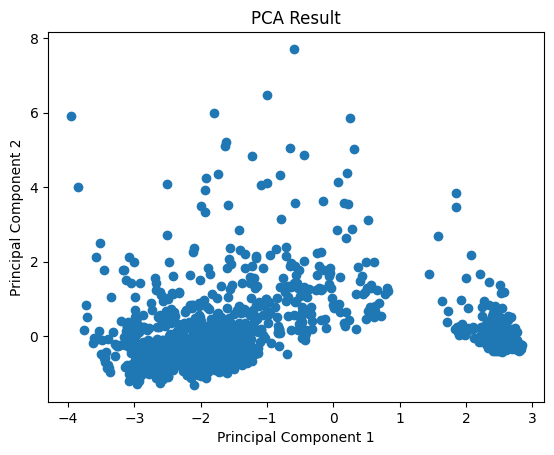

In [31]:
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
